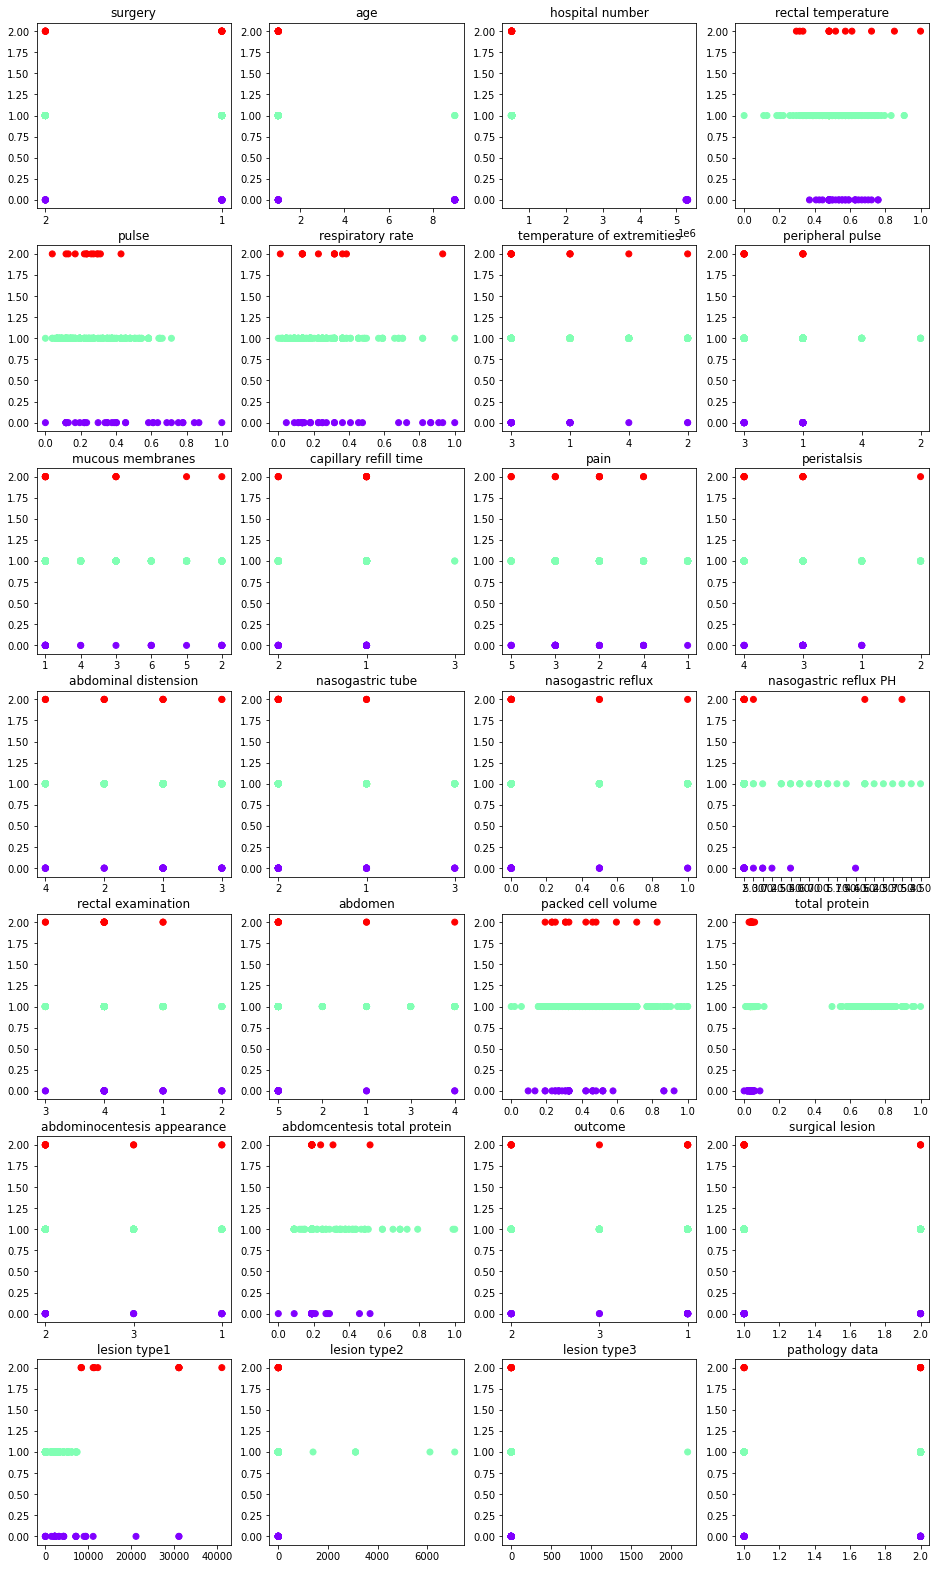

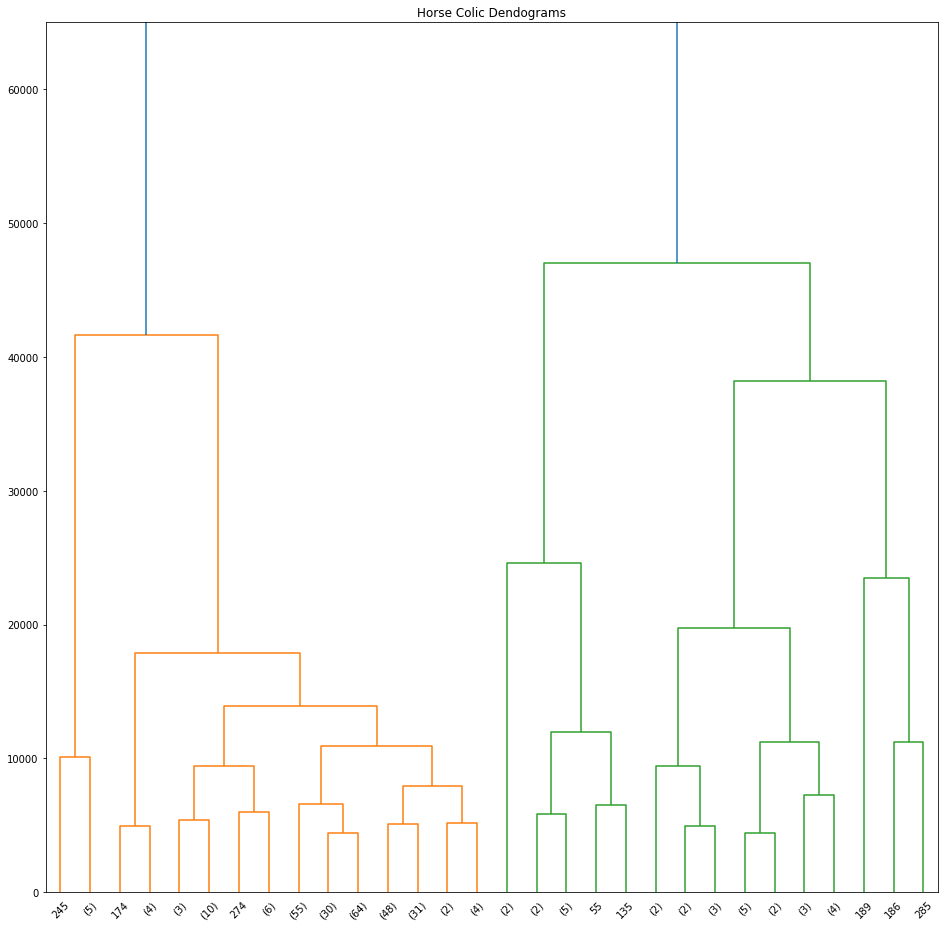

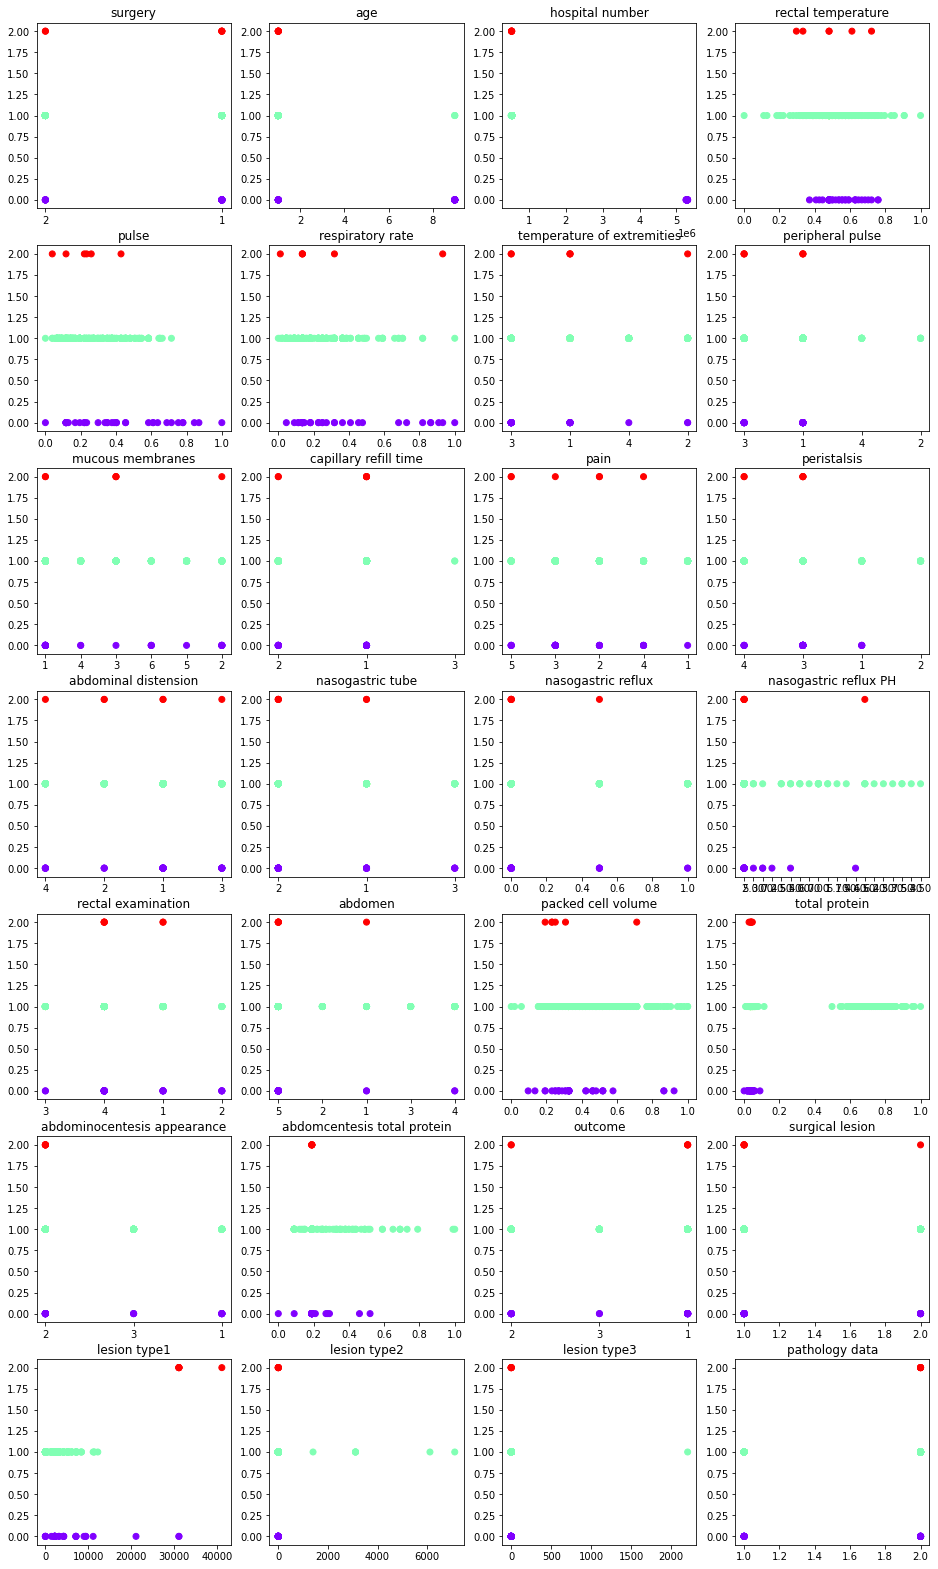

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

colnames = ['surgery', 'age', 'hospital number', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube',
            'nasogastric reflux', 'nasogastric reflux PH', 'rectal examination', 'abdomen', 'packed cell volume', 'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion', 'lesion type1', 'lesion type2', 'lesion type3', 'pathology data']
catagorical_columns = []
numerical_columns = ['rectal temperature', 'pulse', 'respiratory rate',
                     'nasogastric reflux', 'packed cell volume', 'total protein', 'abdomcentesis total protein']
df = pd.read_csv("data\horse-colic.data",
                 sep=' ', names=colnames, header=None)
df.columns.names = ['id']

# df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

# Replace missing values with the most frequant value
complete_df = df.copy()
for col in complete_df.columns:
    complete_df[col] = complete_df[col].replace('?', np.nan)
    complete_df[col] = complete_df[col].fillna(complete_df[col].mode()[0])

normalized_df = complete_df.copy()
to_norm = normalized_df.loc[:, numerical_columns]
# col_normalized = (norm-norm.min()) / (norm.max() - norm.min())
x = to_norm.values  # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
to_norm = pd.DataFrame(x_scaled)
normalized_df[numerical_columns] = to_norm

# K-means
refined_df = normalized_df.copy()
x = refined_df
# y = refined_df[['outcome']]

kmeans = KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
                n_clusters=3, n_init=10,
                random_state=0, tol=0.01, verbose=0)
clusters = kmeans.fit_predict(x)
refined_df['clusters'] = pd.Series(clusters)

n = 0
fig = plt.figure(figsize=(16, 28))
for col in colnames:
    p = plt.subplot(7, 4, n + 1)
    p.set_title(colnames[n])
    plt.scatter(refined_df[col], refined_df['clusters'],
                c=refined_df['clusters'], cmap='rainbow')
    n += 1

# Hieratical
refined_df_2 = normalized_df.copy()
plt.figure(figsize=(16, 16))
plt.title("Horse Colic Dendograms")
dend = shc.dendrogram(shc.linkage(
    refined_df_2, method='complete'), truncate_mode='lastp')
plt.ylim(0, 65000)

Aglo = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(refined_df_2)
refined_df_2['clusters'] = pd.Series(clusters)

n = 0
plt.figure(figsize=(16, 28))
for col in colnames:
    p = plt.subplot(7, 4, n + 1)
    p.set_title(colnames[n])
    plt.scatter(refined_df_2[col], refined_df_2['clusters'],
                c=refined_df_2['clusters'], cmap='rainbow')
    n += 1